# Shifting then Tilting HG(0,0)

***
The effect of a tilt to an already misaligned beam of fundamental mode:

$
	\sum_{n,m} u_{nm}(x,y,0)= u_{00(tilt)}(x,y,0)+ \frac{a}{w_0}u_{10(tilt)}(x,y,0) \; .
$

The first term is verified to be

$
	u_{00 (tilt)} \approx u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
$

The second term approximates to

$
		\frac{a}{w_0} u_{tilt(1,0)}(x,y,0) 			 
			\approx  
			\frac{a}{w_0} 
			u_{10} 
			 \left[
			1 + i \frac{2 \pi x \alpha}{\lambda} \right] \;.
$

***
Therefore:

$
		u(x,y,0)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
				i  \frac{\pi w_{0} \alpha}{\lambda}
			+
			\frac{a}{w_{0}}
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	.
$





In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm
from scipy import integrate
from mpmath import quadgl
from numpy import pi as pi

In [2]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-2,2e-2,1000,-2e-2,2e-2,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 100e-6 #shift
alpha = 500e-6 #tilt angle

#wavelength
lam = params.wavelength #wavelength
w0 = params.w0 #spot size
E0 = 1   #E field
k=2*pi/lam

#scales of each mode
c00_ref = 1
c00 = (1+ (np.pi * a * alpha/ lam)*1j)
c10 = ((a/w0)+ (np.pi*w0*alpha/lam)*1j)
c20 = (np.sqrt(2)*np.pi*a*alpha/lam)*1j


print(c00,c10,c20)

#create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
modes_ref = pl.modes((0,0,c00_ref))


#calculate amp. and phase
#result_rec = pl.calculate(params, plane, modes_rec, z=0)
#result_ref = pl.calculate(params,plane,modes_ref, z=0)



(1+0.14763123372132486j) (0.1+1.4763123372132485j) 0.20878209295856984j


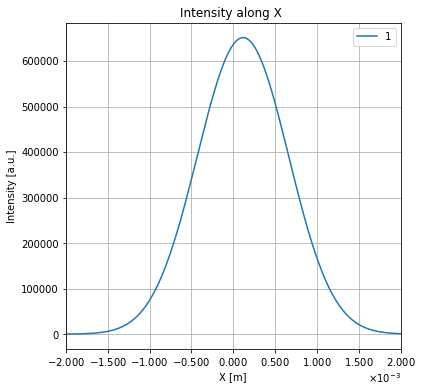

In [11]:
alpha_lin = np.linspace(-500e-6,500e-6,21)


        
c00 = (1+ (np.pi * a * 100e-6/ lam)*1j)
c10 = ((a/w0)+ (np.pi*w0*100e-6/lam)*1j)
c20 = (np.sqrt(2)*np.pi*a*100e-6/lam)*1j

#create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
modes_ref = pl.modes((0,0,c00_ref))

f=pl.calculate(params,plane,modes_rec,0)

pl.intslicex(0,f, xlim=[-2e-3,2e-3])


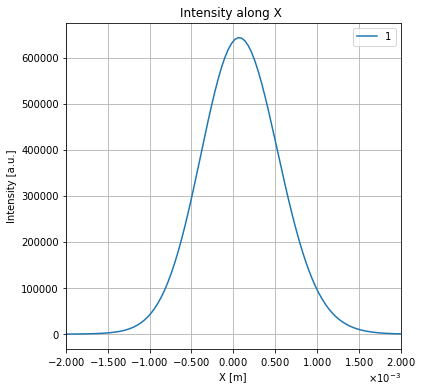

In [12]:

        
c00 = (
                1 
               - 100e-6**2*(k*w0)**2*1/4 
               + (k*a*100e-6/2)*1j
              )
c10 = (
            (a/w0)
            + (k*w0*100e-6/2)*1j
            - 3/4*100e-6**2*(k**2*a*w0)
        )
c20 = (
            np.sqrt(2)*k*a*100e-6/2*1j
            - 100e-6**2*(k*w0)**2*(1/(2*np.sqrt(2)))
              )
c30 = (
            -100e-6**2*(k**2*a*w0)*1/4
        )

        #create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20),(3,0,c30))
modes_ref = pl.modes((0,0,c00_ref))

f=pl.calculate(params,plane,modes_rec,0)

pl.intslicex(0,f, xlim=[-2e-3,2e-3])

In [ ]:
cr_2,cl_2 = integ_2nd_order(alpha_lin)

In [ ]:
size = len(alpha_lin)
phi_r=[0]*size
phi_l=[0]*size
dws_2nd_order = [0]*size
lps_2nd_order = [0]*size

for i in range(len(alpha_lin)):
    phi_r[i] = cm.phase(cr_2[i])
    phi_l[i] = cm.phase(cl_2[i])

    dws_2nd_order[i] = 0.5*(phi_r[i]-phi_l[i])
    lps_2nd_order[i] = 0.5*(phi_r[i]+phi_l[i])

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, dws_1st_order)
plt.plot(alpha_lin, dws_2nd_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS, $\Delta \phi\;[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, lps_1st_order)
plt.plot(alpha_lin, lps_2nd_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS $\;[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()